In [ ]:
#1

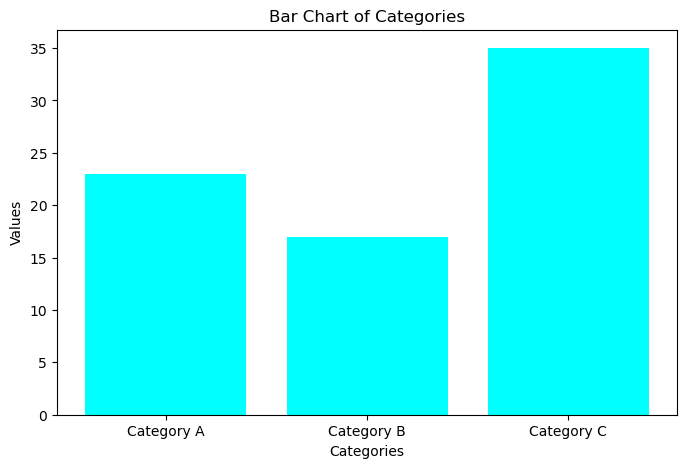

In [1]:
import matplotlib.pyplot as plt

categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()

In [ ]:
#2

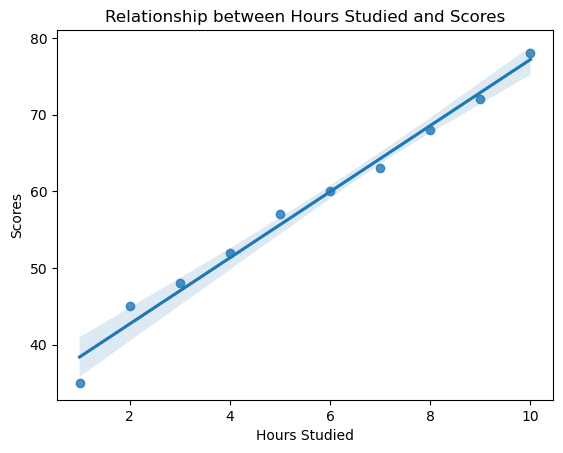

In [2]:
import seaborn as sns
import pandas as pd

data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

In [ ]:
#HW

In [ ]:
#1

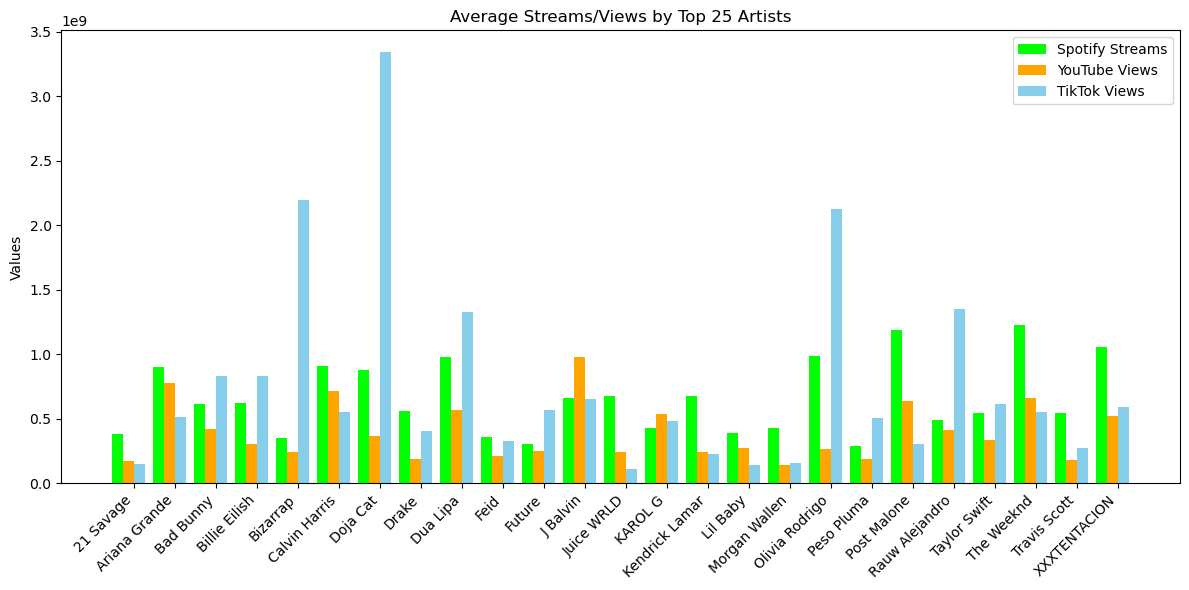

In [16]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = kagglehub.dataset_download("nelgiriyewithana/most-streamed-spotify-songs-2024")

df = pd.read_csv(
    os.path.join(path, "Most Streamed Spotify Songs 2024.csv"),
    encoding="latin1"
)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

numeric_cols = [
    "spotify_streams", "youtube_views", "tiktok_views",
    "spotify_playlist_count", "spotify_playlist_reach",
    "spotify_popularity", "youtube_likes",
    "tiktok_posts", "tiktok_likes"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(",", "").replace("None", np.nan)
        df[col] = pd.to_numeric(df[col], errors="coerce")

top_artists = df["artist"].value_counts().head(25).index
artist_data = df[df["artist"].isin(top_artists)]

grouped = artist_data.groupby("artist").mean(numeric_only=True)

plot_cols = []
plot_labels = []
plot_colors = []

if "spotify_streams" in grouped.columns:
    plot_cols.append(grouped["spotify_streams"])
    plot_labels.append("Spotify Streams")
    plot_colors.append("lime")

if "youtube_views" in grouped.columns:
    plot_cols.append(grouped["youtube_views"])
    plot_labels.append("YouTube Views")
    plot_colors.append("orange")

if "tiktok_views" in grouped.columns:
    plot_cols.append(grouped["tiktok_views"])
    plot_labels.append("TikTok Views")
    plot_colors.append("skyblue")

if len(plot_cols) > 0:
    x = np.arange(len(grouped))
    width = 0.8 / len(plot_cols)

    plt.figure(figsize=(12, 6))

    for i, data in enumerate(plot_cols):
        plt.bar(
            x + (i * width) - (width * len(plot_cols) / 2),
            data,
            width,
            label=plot_labels[i],
            color=plot_colors[i]
        )

    plt.xticks(x, grouped.index, rotation=45, ha="right")
    plt.title("Average Streams/Views by Top 25 Artists")
    plt.ylabel("Values")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No numeric stream/view columns found to plot.")

In [ ]:
#2

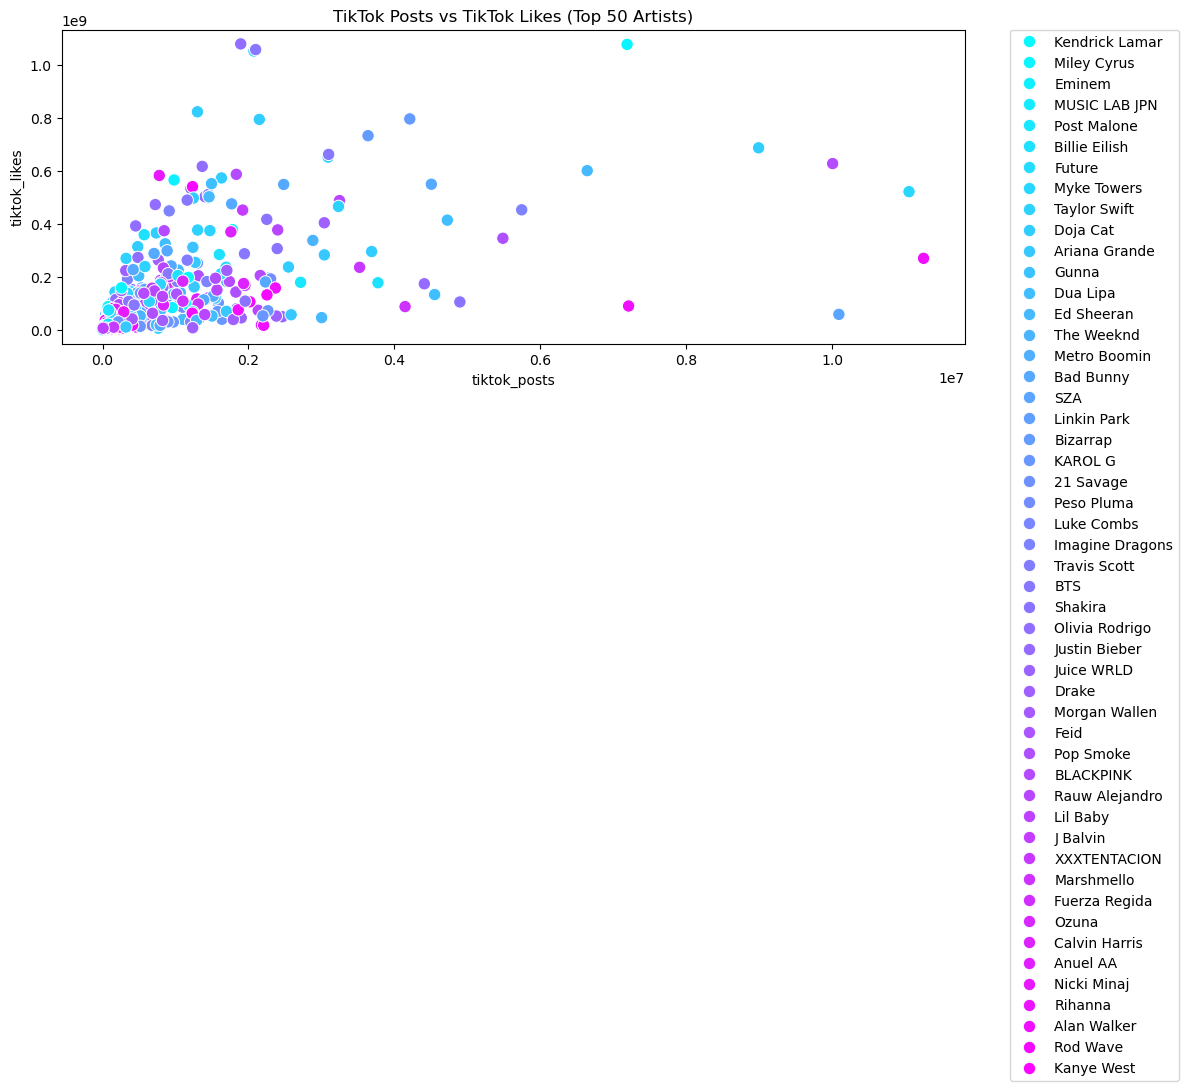

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

top50 = df["artist"].value_counts().head(50).index
df_top50 = df[df["artist"].isin(top50)]

plt.figure(figsize=(12, 8))

g = sns.scatterplot(
    data=df_top50,
    x="tiktok_posts",
    y="tiktok_likes",
    hue="artist",
    palette="cool",
    s=80
)

plt.title("TikTok Posts vs TikTok Likes (Top 50 Artists)")

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    ncol=1
)

plt.tight_layout()
plt.show()

In [ ]:
#3

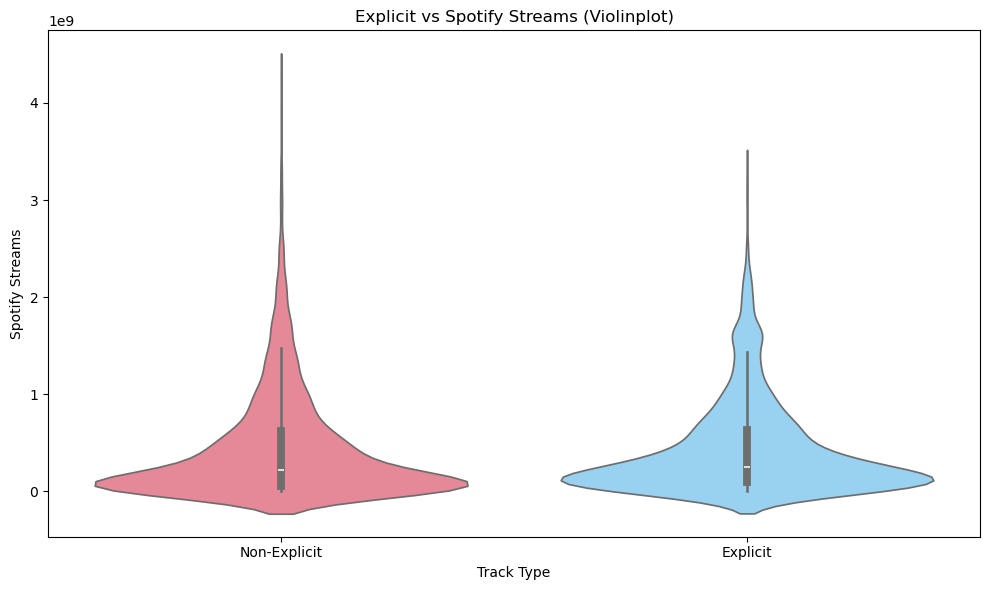

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x="explicit_track",
    y="spotify_streams",
    hue="explicit_track",
    palette=["#f5788d", "#8ad6ff"],
    legend=False
)

plt.xticks([0, 1], ["Non-Explicit", "Explicit"])
plt.xlabel("Track Type")
plt.ylabel("Spotify Streams")
plt.title("Explicit vs Spotify Streams (Violinplot)")

plt.tight_layout()
plt.show()

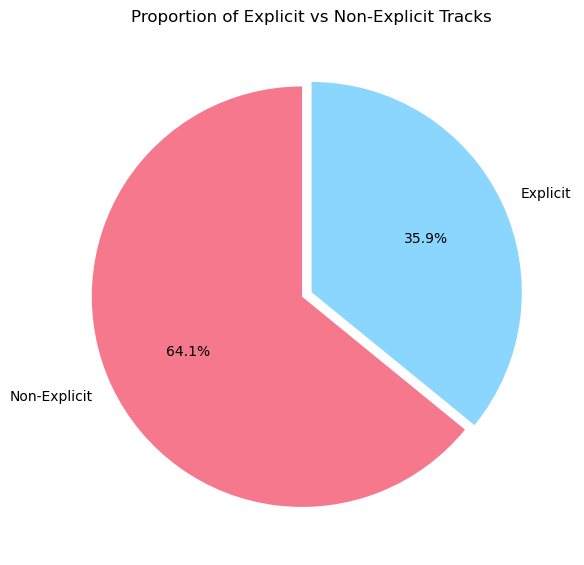

In [39]:
import matplotlib.pyplot as plt

counts = df["explicit_track"].value_counts().sort_index()

labels = ["Non-Explicit", "Explicit"]
sizes = [counts[0], counts[1]]

colors = ["#f5788d", "#8ad6ff"]  

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,        
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0),
)

plt.title("Proportion of Explicit vs Non-Explicit Tracks")
plt.tight_layout()
plt.show()

In [24]:
print(df.columns.tolist())

['track', 'album_name', 'artist', 'release_date', 'isrc', 'all_time_rank', 'track_score', 'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach', 'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach', 'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins', 'deezer_playlist_count', 'deezer_playlist_reach', 'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations', 'soundcloud_streams', 'shazam_counts', 'tidal_popularity', 'explicit_track']
